In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [105]:
tweets_df = pd.read_csv("./resources/tweet_data.csv")

In [106]:
tweets_df.head(1)

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,THANK YOU @NAPOpolice and their 241000 brave l...,07-16-2020 03:13:11,30356.0,114261,false,1.283601e+18


In [107]:
# tweets_df["created_at"] =  pd.to_datetime(tweets_df["created_at"], format="%m-%d-%Y %H:%M:%S")
tweets_df["created_at"] =  pd.to_datetime(tweets_df["created_at"], infer_datetime_format=True, errors="coerce")

tweets_df["created_at"].value_counts()

2019-09-09 03:11:53    4
2020-05-30 12:41:04    4
2019-09-04 21:08:58    4
2019-05-20 11:20:53    4
2019-06-09 12:26:37    4
                      ..
2013-10-28 20:46:01    1
2020-03-30 11:19:25    1
2012-11-27 21:36:38    1
2018-04-24 16:43:34    1
2013-01-14 16:55:18    1
Name: created_at, Length: 43913, dtype: int64

In [108]:
# dates_with_abidjan_time_zone = dates.dt.tz_localize('Africa/Abidjan')
tweets_df["created_at"] = tweets_df["created_at"].dt.tz_localize("UTC")
tweets_df["created_at"]

0       2020-07-16 03:13:11+00:00
1       2020-07-16 00:57:13+00:00
2       2020-07-16 00:57:12+00:00
3       2020-07-16 00:57:12+00:00
4       2020-07-15 16:13:44+00:00
                   ...           
44344   2009-05-12 14:07:28+00:00
44345   2009-05-08 20:40:15+00:00
44346   2009-05-08 13:38:08+00:00
44347   2009-05-05 01:00:10+00:00
44348   2009-05-04 18:54:25+00:00
Name: created_at, Length: 44349, dtype: datetime64[ns, UTC]

In [109]:
tweets_df["created_at"] = tweets_df["created_at"].dt.tz_convert('US/Eastern')

In [110]:
tweets_df["created_at"]

0       2020-07-15 23:13:11-04:00
1       2020-07-15 20:57:13-04:00
2       2020-07-15 20:57:12-04:00
3       2020-07-15 20:57:12-04:00
4       2020-07-15 12:13:44-04:00
                   ...           
44344   2009-05-12 10:07:28-04:00
44345   2009-05-08 16:40:15-04:00
44346   2009-05-08 09:38:08-04:00
44347   2009-05-04 21:00:10-04:00
44348   2009-05-04 14:54:25-04:00
Name: created_at, Length: 44349, dtype: datetime64[ns, US/Eastern]

In [111]:
tweets_df["tweet_hour"] = tweets_df["created_at"].dt.hour

In [112]:
tweets_df["tweet_hour"].value_counts()

15.0    3078
16.0    3067
8.0     2943
9.0     2831
7.0     2688
14.0    2661
10.0    2606
22.0    2306
11.0    2256
13.0    2066
21.0    2053
12.0    2033
17.0    1956
20.0    1931
18.0    1790
23.0    1685
19.0    1648
6.0     1591
0.0     1146
5.0      565
1.0      451
4.0      386
2.0      321
3.0      284
Name: tweet_hour, dtype: int64

In [113]:
analyser = SentimentIntensityAnalyzer()


In [114]:
def get_sentiment_scores(sentence):
    snt = analyser.polarity_scores(sentence)
    return snt

In [115]:
get_sentiment_scores(tweets_df["text"][0])

{'neg': 0.0, 'neu': 0.773, 'pos': 0.227, 'compound': 0.882}

In [116]:
sentiments = []
for text in tweets_df["text"]:
    try:
        sentiments.append(get_sentiment_scores(text))
    except:
        sentiments.append(np.nan)
tweets_df["sentiments"] = sentiments

In [117]:
tweets_df["sentiments"]

0        {'neg': 0.0, 'neu': 0.773, 'pos': 0.227, 'comp...
1        {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'comp...
2        {'neg': 0.0, 'neu': 0.733, 'pos': 0.267, 'comp...
3        {'neg': 0.0, 'neu': 0.896, 'pos': 0.104, 'comp...
4        {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
                               ...                        
44344    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
44345    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
44346    {'neg': 0.0, 'neu': 0.739, 'pos': 0.261, 'comp...
44347    {'neg': 0.0, 'neu': 0.749, 'pos': 0.251, 'comp...
44348    {'neg': 0.0, 'neu': 0.827, 'pos': 0.173, 'comp...
Name: sentiments, Length: 44349, dtype: object

[Text(0.5, 0, 'Hour of tweet Eastern Time'),
 Text(0, 0.5, 'Compound sentiment')]

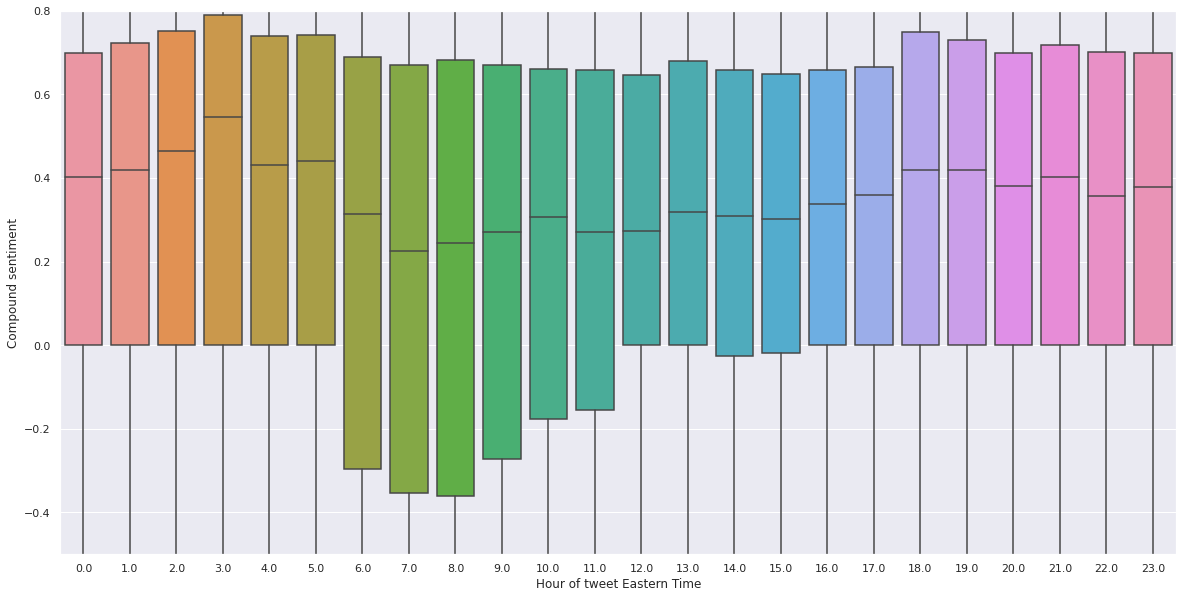

In [121]:
compound_sentiment = []
for sentiment in tweets_df["sentiments"]:
    try:
        compound_sentiment.append(sentiment["compound"])
    except:
        compound_sentiment.append(np.nan)
tweets_df["compound_sentiment"] = compound_sentiment

# tweets_df["compound_sentiment"]

# tweets_df.plot.scatter(x="tweet_hour", y="compound_sentiment")



sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.boxplot(x="tweet_hour", y="compound_sentiment", data=tweets_df, fliersize= 0)
ax.set(ylim=(-0.5, 0.8))
ax.set(xlabel='Hour of tweet Eastern Time', ylabel='Compound sentiment')

